<a href="https://colab.research.google.com/github/bohuslavska/Hillel/blob/main/%D0%94%D0%97_%D0%97_%D0%91%D0%BE%D0%B3%D1%83%D1%81%D0%BB%D0%B0%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**General Data Insights**


In [4]:
train_data = pd.read_csv('https://raw.githubusercontent.com/korobool/hlll_course/master/tasks/data/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#У датасета 891 строка и 12 колонок, одна из которых - целевая (Survived).

train_data.shape

(891, 12)

In [6]:
#Смотрим типы данных в колонках и пропущенные значения. Больше всего их в колонке Cabin и Age.
#Есть данные типов object, float, integer.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Получается, 177 пропущенных значений из 891 в Age и 687 из 891 в Cabin. Сразу делаем вывод, что Cabin можно удалить.

train_data[['Age', 'Cabin']].isna().sum()

Age      177
Cabin    687
dtype: int64

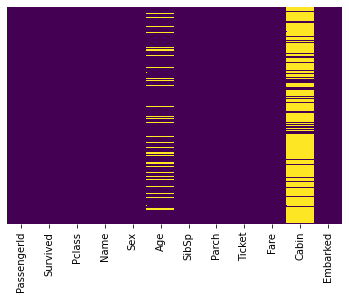

In [8]:
#Посмотрим, как это выглядит на тепловой карте.

sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [9]:
#Исходя из разницы между mean и 50% персентилем, а также 75% персентилем и максимальным значением, можем сделать вывод о выбросах в колонках Age, SibSp и Fare.

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Understanding Target variable**

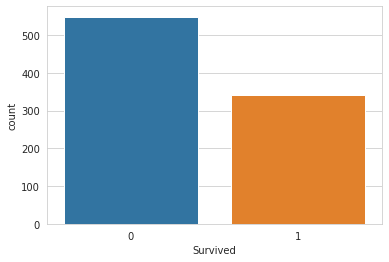

In [10]:
#Посмотрим, как соотносятся выжившие и погибшие люди. Последних намного больше.

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data);

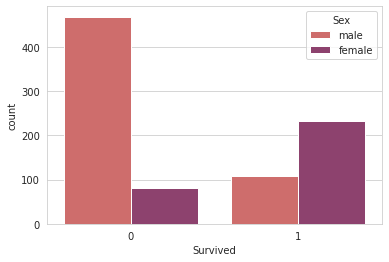

In [11]:
#Посмотрим гендерное распределение выживших и погибших.
#Видно, что погибло больше мужчин, а выжило больше женщин.

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='flare');

In [12]:
#Посмотрим, в каком классе сколько людей путешествовали.

train_data['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

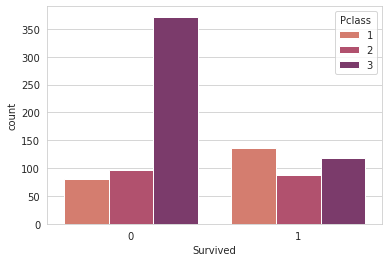

In [13]:
#Теперь проанализируем распределение выживших и погибших в зависимости от класса.
#Больше всего людей погибло из третьего класса, меньше всего - из первого.
#Больше всего людей выжило из первого класса, меньше всего - из второго.
#Как обычно, выжили наиболее привилегированные.

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='flare');


**Observations**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


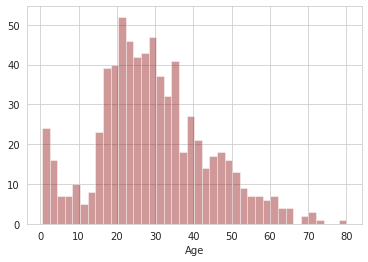

In [14]:
#Посмотрим, какие возрастные группы были представлены на корабле.
#Больше всего пассажиров было где-то с 20 до 35.

sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40);


In [15]:
#Видим, каких возрастов было больше всего.

train_data['Age'].value_counts().head(20)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
32.0    18
35.0    18
27.0    18
26.0    18
16.0    17
31.0    17
20.0    15
34.0    15
33.0    15
23.0    15
Name: Age, dtype: int64

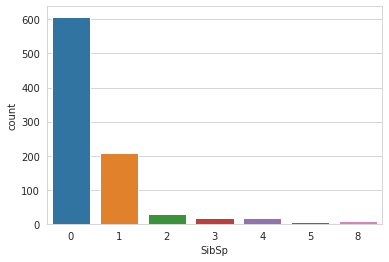

In [16]:
#Видим, что из 891 человек больше 600 были на корабле без супругов, а также без братьев и сестер.

sns.countplot(x='SibSp',data=train_data);

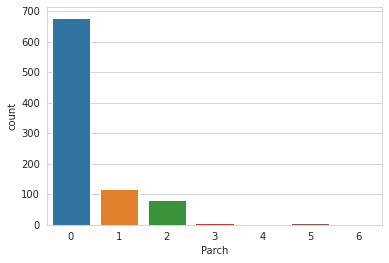

In [17]:
#Видим, что почти 700 из 891 человек были на корабле без детей и родителей.

sns.countplot(x='Parch',data=train_data);

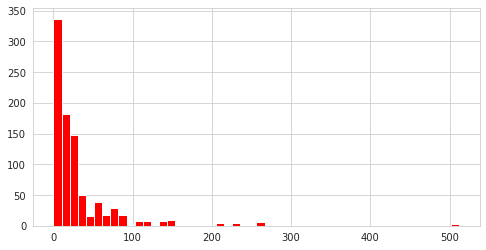

In [18]:
#Мы уже знаем, что пассажиров третьего класса было больше всего, поэтому и дешевых билетов больше.

train_data['Fare'].hist(color='red',bins=50,figsize=(8,4));


In [19]:
#Очень дорогих (дороже 100) билетов было очень мало - только 53.

expensive_tickets = train_data[train_data.Fare >100]
expensive_tickets.shape[0]

53

**Compensation of Missing Values**

In [20]:
#Сначала удалим колонку Cabin - ее уже не спасти

train_data.drop('Cabin',axis=1,inplace=True)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
#Теперь заполним средним по классу возрастом пропуски в колонке Age
#Смотрим средний возраст по классам

train_data.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [22]:
#Теперь заполним средним по классу возрастом пропуски в колонке Age.

def fill_missing_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [23]:
#Применим эту функцию к колонке.

train_data['Age'] = train_data[['Age','Pclass']].apply(fill_missing_age,axis=1)


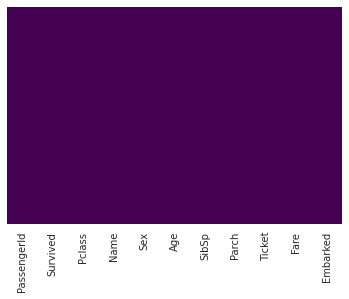

In [24]:
#Справились с пробелами.
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

**Correlation**

In [25]:
#Переводим категориальные данные в количественные.

sex = pd.get_dummies(train_data['Sex'], drop_first=False)
embark = pd.get_dummies(train_data['Embarked'], drop_first=False)


In [26]:
#Вот такая таблица с количественными данными.

train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train_data,sex,embark],axis=1)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [27]:
#Приведем все типы к типу float.

train.astype(dtype = 'float')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0
888,889.0,0.0,3.0,25.0,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,1.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0


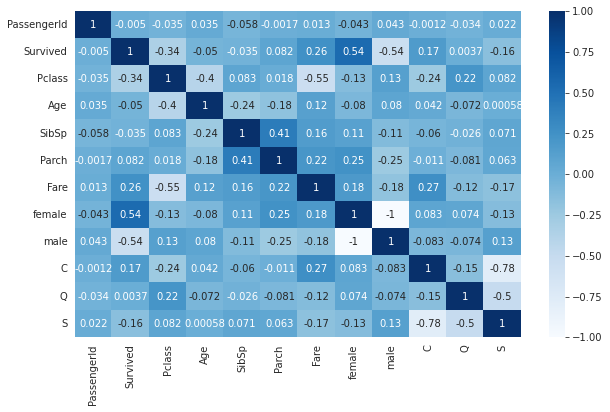

In [28]:
#Самая сильная корреляция между теми, кто выжил, и их полом и классом. Что мы уже выяснили ранее.

plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),cmap='Blues',annot=True);
